Duplicate key in file WindowsPath('C:/Users/81804/anaconda3/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 258 ('font.family:  sans-serif')


Index(['和暦', '西暦', '月日', '天気', '経済的事象', '自然災害・災害など', '騒動', '金相場最小値', '金相場最高値',
       '金相場メモ', '銭相場最小値', '銭相場最高値', '銭相場メモ', '米相場', '米相場メモ', '備考'],
      dtype='object', name=0)
0
和暦                                                        天明7年
西暦                                                       1787年
月日                                                        1月1日
天気                                                          曇天
経済的事象                                                      NaN
自然災害・災害など                                                  NaN
騒動                                                         NaN
金相場最小値                                                     NaN
金相場最高値                                                     NaN
金相場メモ                                                      NaN
銭相場最小値                                                     NaN
銭相場最高値                                                     NaN
銭相場メモ                                                      NaN
米相

<AxesSubplot:xlabel='year'>

findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


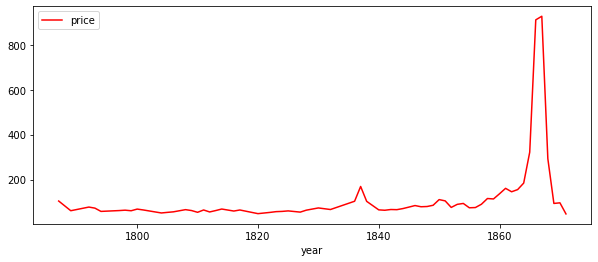

In [1]:
# -*- coding:utf-8 -*-

# 山本くんデータセットで練習！

import pandas as pd
import matplotlib.pyplot as plt

df_edo = pd.read_csv("C:\\Users\\81804\\working_directory\\yamamoto_edo\\edo_keizai.csv", encoding='utf-8')

# columnsの変更
df_edo.columns = df_edo.iloc[0]
print("="*180)
# df_edoはdf_edo.iloc[1:]に変更
df_edo = df_edo.iloc[1:]
print(df_edo.columns)
print(df_edo.iloc[0])
# df_edoの中で使わない列を削除
df_sample = df_edo[["西暦", "米相場"]]
print(df_sample.head())
print(df_sample.columns)
print(df_sample.shape)
print(type(df_sample.iat[0, 0]))

# df_sample["西暦"]をint型にキャスト
for i in range(df_sample.shape[0]):
    df_sample.iat[i, 0] = df_sample.iat[i, 0].replace("年", "")
    df_sample.iat[i, 0] = int(df_sample.iat[i, 0])
    
# 欠損値の処理
print(df_sample.head())
# 欠損値処理①:削除
print(f"全体のデータは{df_sample.shape[0]}個です.")
# df_sample = df_sample.dropna(how='any')
print(f"値を持つデータは{df_sample.shape[0]}個です.")

# 欠損値処理②:置換(穴埋め)
# 前の値で置換,後ろ30個は前の過去の直近の値で置換
# この補完が適切なのか問題
# 強引に補完したけど,全部補完しなくてもいいかも
df_sample = df_sample.fillna(method='bfill')
print(df_sample.head())
df_sample.iloc[-30:].fillna(method='ffill')
print(df_sample.iloc[-10:])

# 最後の欠損値処理:df_sample["米相場"]のデータ型がfloatでなければその行は削除する
df_sample = df_sample[df_sample["米相場"] != "なし"]

# 年数毎に平均を算出し,新しいデータフレームを作成する
import numpy as np
year_list = np.unique(df_sample["西暦"])

print(type(year_list))
print(df_sample["西暦"])

year_period = year_list[-1]-year_list[0]+1
year_with_data = len(year_list)
print(f"記録された期間は{year_period}年間,実際にデータがあるのは{year_with_data}年分,つまり{year_period-year_with_data}年分のデータが欠落している.")

# 各年のデータの平均値をその年の米相場として新たなデータフレームに格納する
new_data = []
for i in year_list:
    df_current_year = df_sample[df_sample["西暦"] == i]
    data_count = df_current_year.shape[0]
    df_current_year = df_current_year.astype({'米相場': float})
    total_price = df_current_year["米相場"].sum()
    average_price = total_price / data_count
    new_data.append(average_price)
    
    
# 各年の平均米相場が格納されたリスト

print(year_list)
print(new_data)
print(len(new_data))
print(len(year_list))

to_df_list = [[year_list[i], new_data[i]] for i in range(len(year_list))]

df_mean_price = pd.DataFrame(to_df_list, columns=["year", "price"])

print(df_mean_price.head())
df_mean_price.plot(x='year', y='price', figsize=(10, 4), color='r')

